## What are the most demanded skills for the top 3 most popular data roles?
### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

# Loding data set
df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\Python_JobPosting_Project\data_jobs.csv')

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
# Filtering data for India and US 
df_Ind_US = df[(df['job_country']=='India') | (df['job_country']=='United States')].copy()

df_skills = df_Ind_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1278,python,Data Scientist,51627
1598,sql,Data Analyst,37611
1599,sql,Data Engineer,36951
1600,sql,Data Scientist,36401
1277,python,Data Engineer,34330
...,...,...,...
873,lua,Software Engineer,1
512,fastify,Data Engineer,1
875,macos,Cloud Engineer,1
880,macos,Senior Data Engineer,1


In [24]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [36]:
df_job_title_count = df_Ind_US['job_title_short'].value_counts().reset_index(name='job_total')

In [64]:
# Merging the df
df_skill_perc = pd.merge(df_skills_count, df_job_title_count,how='left', on='job_title_short')
df_skill_perc['skill_per'] = 100*(df_skill_perc['skill_count']/df_skill_perc['job_total']).round(3)

df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_per
0,python,Data Scientist,51627,72109,71.6
1,sql,Data Analyst,37611,73937,50.9
2,sql,Data Engineer,36951,54142,68.2
3,sql,Data Scientist,36401,72109,50.5
4,python,Data Engineer,34330,54142,63.4
...,...,...,...,...,...
1966,lua,Software Engineer,1,3609,0.0
1967,fastify,Data Engineer,1,54142,0.0
1968,macos,Cloud Engineer,1,774,0.1
1969,macos,Senior Data Engineer,1,13642,0.0


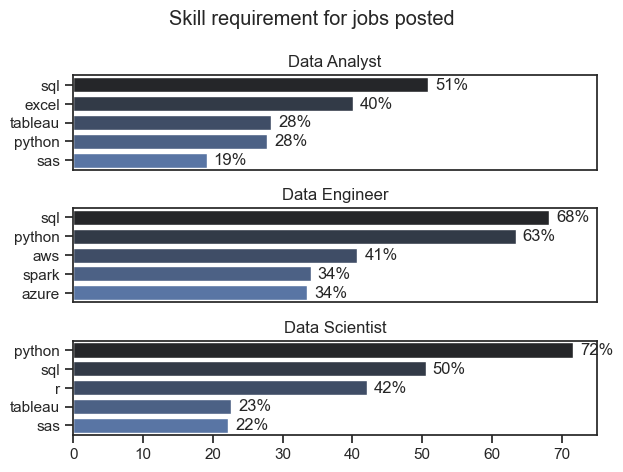

In [89]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_per', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', dodge=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,75)

    for j,val in enumerate(df_plot['skill_per']):
        ax[i].text(val+1, j, f'{val:.0f}%', va='center')
    
    if i != len(job_titles)-1:
        ax[i].set_xticks([])

plt.suptitle('Skill requirement for jobs posted')
plt.tight_layout()
plt.show()